In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [10]:
df = pd.read_csv("Resources/People_Involved.csv")

In [11]:
df.head(10)

,Unnamed: 0,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County
0,0,470714,57,1,NaN,"Front Seat, Left Side",False,True,Reported as Unknown,Reported as Unknown,Test Not Given,2019-09-15,Harley-Davidson,Harley-Davidson 750cc or greater,2014,Tennessee,SHELBY (157)
1,1,480881,68,1,NaN,"Front Seat, Left Side",False,True,Not Reported,Not Reported,Test Not Given,2019-04-20,Nissan/Datsun,Nissan/Datsun Nissan/Datsun Pickup (1955-1997),1994,Texas,HARRIS (201)
2,2,120420,72,1,NaN,"Front Seat, Left Side",True,False,No (drugs not involved),No (Alcohol Not Involved),Not Reported,2020-02-19,Honda,Honda Ridgeline,2020,Florida,BREVARD (9)
3,3,120420,80,2,NaN,"Front Seat, Right Side",True,False,Not Reported,Not Reported,Test Not Given,2020-02-19,Honda,Honda Ridgeline,2020,Florida,BREVARD (9)
4,4,240309,43,1,NaN,"Front Seat, Left Side",False,False,Reported as Unknown,Yes (Alcohol Involved),Not Reported,2021-08-29,Triumph,Triumph 450-749cc,2022,Maryland,FREDERICK (21)
5,5,240309,24,2,NaN,"Second Seat, Left Side",False,True,Not Reported,Not Reported,0.120 % BAC,2021-08-29,Triumph,Triumph 450-749cc,2022,Maryland,FREDERICK (21)
6,6,130616,43,2,Black,"Front Seat, Left Side",False,True,Not Reported,Not Reported,0.000 % BAC,2018-06-11,Honda,Honda Accord (Note: For Crosstour model years ...,1997,Georgia,THOMAS (275)
7,7,170825,25,1,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Not Reported,No (Alcohol Not Involved),Test Not Given,2018-11-03,Nissan/Datsun,Nissan/Datsun Pathfinder Armada,2018,Illinois,UNION (181)
8,8,170825,25,1,Not a Fatality (not Applicable),"Second Seat, Left Side",True,False,Not Reported,Not Reported,Test Not Given,2018-11-03,Nissan/Datsun,Nissan/Datsun Pathfinder Armada,2018,Illinois,UNION (181)
9,9,170825,47,1,Black,"Front Seat, Right Side",True,True,Not Reported,Not Reported,0.000 % BAC,2018-11-03,Nissan/Datsun,Nissan/Datsun Pathfinder Armada,2018,Illinois,UNION (181)


<Figure size 1000x600 with 0 Axes>

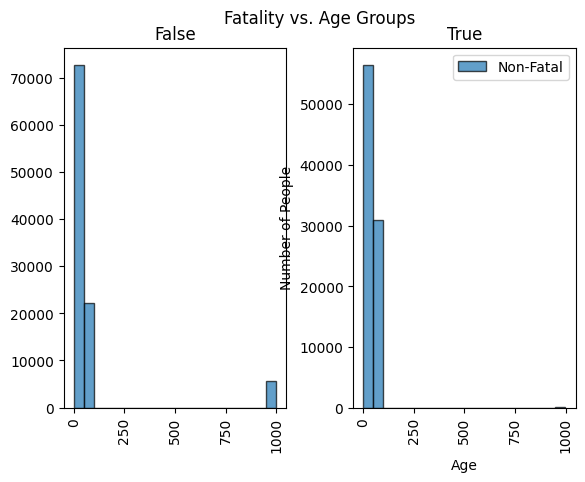

In [12]:
# plot fatality vs age groups
plt.figure(figsize=(10, 6))
df['Age'].hist(by=df['Is Fatal'], bins=20, edgecolor='black', alpha=0.7)
plt.suptitle('Fatality vs. Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend(['Non-Fatal', 'Fatal'])
plt.show()

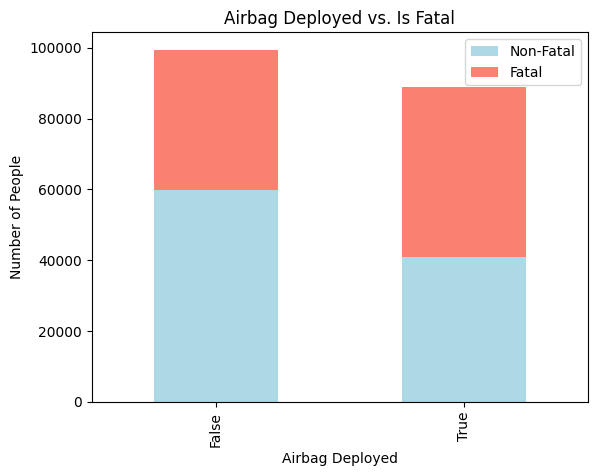

In [13]:
# Plot airbag deploy vs. fatality
airbag_fatality_count = df.groupby(['AirBag Deployed', 'Is Fatal']).size().unstack()
airbag_fatality_count.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Airbag Deployed vs. Is Fatal')
plt.xlabel('Airbag Deployed')
plt.ylabel('Number of People')
plt.legend(['Non-Fatal', 'Fatal'])
plt.show()

In [14]:
# read the age data
Age_df = pd.read_csv("Resources/People_Involved.csv")
Age = Age_df["Age"]


In [15]:
Age_df.head()

,Unnamed: 0,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County
0,0,470714,57,1,NaN,"Front Seat, Left Side",False,True,Reported as Unknown,Reported as Unknown,Test Not Given,2019-09-15,Harley-Davidson,Harley-Davidson 750cc or greater,2014,Tennessee,SHELBY (157)
1,1,480881,68,1,NaN,"Front Seat, Left Side",False,True,Not Reported,Not Reported,Test Not Given,2019-04-20,Nissan/Datsun,Nissan/Datsun Nissan/Datsun Pickup (1955-1997),1994,Texas,HARRIS (201)
2,2,120420,72,1,NaN,"Front Seat, Left Side",True,False,No (drugs not involved),No (Alcohol Not Involved),Not Reported,2020-02-19,Honda,Honda Ridgeline,2020,Florida,BREVARD (9)
3,3,120420,80,2,NaN,"Front Seat, Right Side",True,False,Not Reported,Not Reported,Test Not Given,2020-02-19,Honda,Honda Ridgeline,2020,Florida,BREVARD (9)
4,4,240309,43,1,NaN,"Front Seat, Left Side",False,False,Reported as Unknown,Yes (Alcohol Involved),Not Reported,2021-08-29,Triumph,Triumph 450-749cc,2022,Maryland,FREDERICK (21)


In [16]:
Age.head()

0    57
1    68
2    72
3    80
4    43
Name: Age, dtype: int64

In [22]:
# Calculating mean, median and mode
mean_numpy =np.mean(Age)
print(f"Mean Age (NumPy) :{mean_numpy}")

Mean Age (NumPy) :68.58572604850062


In [23]:
median_numpy =np.median(Age)
print(f"Median Age (NumPy) :{median_numpy}")

Median Age (NumPy) :35.0


In [25]:
mode_scipy = st.mode(Age)
print(f"Mode Age (Scipy) :{mode_scipy}")

Mode Age (Scipy) :ModeResult(mode=21, count=5238)


In [26]:
# Calculating the Variance and STandard deviation
var_numpy = np.var(Age,ddof =0)
print(f"Variance Age (NumPy) :{var_numpy}")

Variance Age (NumPy) :28349.79079309497


In [27]:
sd_numpy = np.std(Age,ddof = 0)
print(f"Standard Deviation Age (NumPy) :{sd_numpy}")

Standard Deviation Age (NumPy) :168.37396114926727


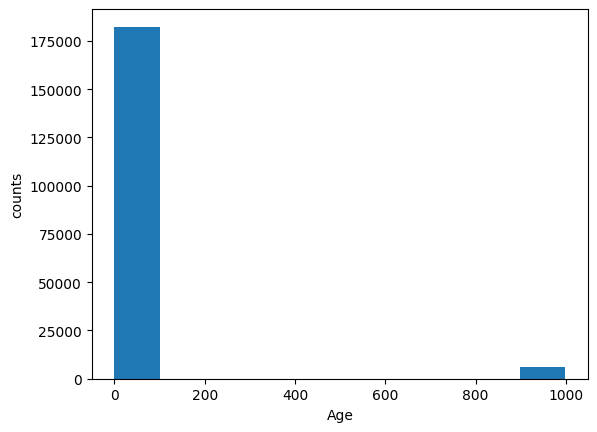

NormaltestResult(statistic=110.20266149325523, pvalue=1.1743461037358009e-24)


In [28]:
plt.hist(Age)
plt.xlabel("Age")
plt.ylabel("counts")
plt.show()
print(st.normaltest(Age.sample(50)))

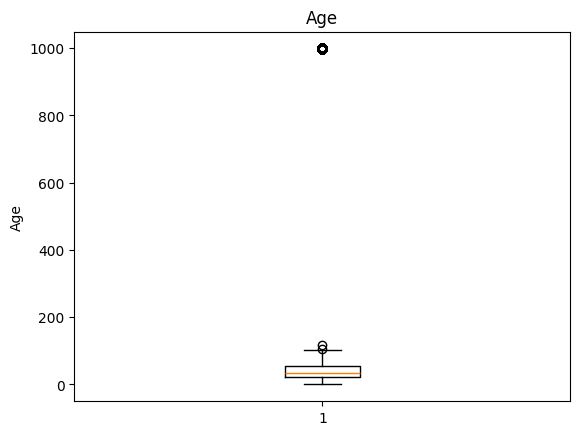

In [29]:
#Age Data to computes quantiles
Age_df = pd.read_csv("Resources/People_Involved.csv")
Age = Age_df["Age"]
fig1, ax1 =plt.subplots()
ax1.set_title("Age") 
ax1.set_ylabel("Age")
ax1.boxplot(Age)
plt.show()

In [32]:
Age.quantile([.25,.50,.75])

0.25    23.0
0.50    35.0
0.75    55.0
Name: Age, dtype: float64

In [31]:
quartiles = Age.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"lower quartile of Age is: {lowerq}")
print(f"upper quartile of Age is: {upperq}")
print(f"interquartile range of Age is: {iqr}")
print(f"median of Age is {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound} could be outlier.")




lower quartile of Age is: 23.0
upper quartile of Age is: 55.0
interquartile range of Age is: 32.0
median of Age is 35.0
values below -25.0 could be outliers.
values above 103.0 could be outlier.
